In [94]:
using LinearAlgebra # need this to do the cross product
using PyPlot # Using Plots http://docs.juliaplots.org/latest/install/
# https://gist.github.com/gizmaa/7214002 - examples uing PyPlot in Julia

In [95]:
e = 1.602176634e-19
m = 9.1093837015e-31
gyro =  e/(2.0*m)
mu_e=1.85480201566e-23;
mu_B = 9.27400968e-24;

First set up a SG experiment with field in z direction and fire beam along x direction

In [96]:
machine_dim_x = 1.0
machine_dim_y = 0.1
machine_dim_z = 0.1

Bmin = 1.0e-4
Bmax = 10.0e-4
deltaB = Bmax - Bmin
gradB0 = deltaB / machine_dim_z;

In [97]:
function B(r)
    B = zeros(3)
    B[3] = Bmin + deltaB*r[3]/machine_dim_z
    return B
end;

In [98]:
function gradB(r)
    gradB = zeros(3,3)
    gradB[3,3] = gradB0
    return gradB
end;

In [99]:
dt = 1.0e-11
t_max = 1.0e-5
times = collect(0:dt:t_max)

mu = [0.0,1/sqrt(2),1/sqrt(2)]*mu_e
r = [0,0.05,0.05]
v = [600.0,0,0]
r_save = zeros(length(times),3)
mu_save = zeros(length(times),3);

In [100]:
for (i,t) in enumerate(times)
    
    r_save[i,:] = r
    mu_save[i,:] = mu
    
    v += (0.5*dt*(mu'*gradB(r))/m)'
    mu += dt*gyro*cross(mu,B(r))
    r += dt*v
    v += (0.5*dt*(mu'*gradB(r))/m)'
    

end

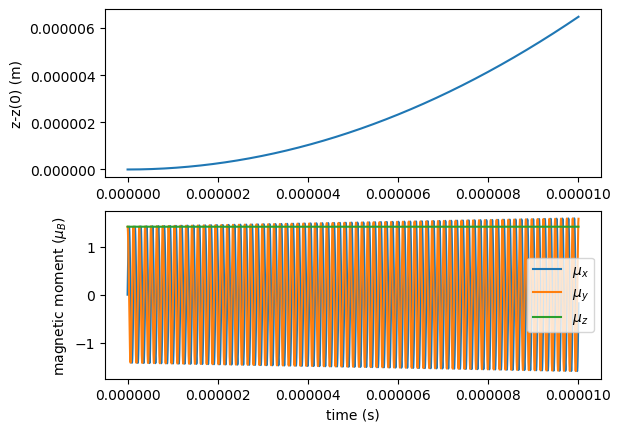

In [101]:
subplot(211)
plot(times,(r_save[:,3].-r_save[1,3]), label="z");
ylabel("z-z(0) (m)")

subplot(212)
plot(times,mu_save[:,1]./mu_B, label=L"$\mu_x$")
plot(times,mu_save[:,2]./mu_B, label=L"$\mu_y$")
plot(times,mu_save[:,3]./mu_B, label=L"$\mu_z$")
xlabel("time (s)")
ylabel(L"magnetic moment ($\mu_B$)")
legend();

Now let's imagine we take the output of the first SG experiment and put it into another one rotated 90 degrees so that the field is in y. The B field parameters are still the same, but we need to redefine out B and gradB functions:

In [102]:
function B(r)
    B = zeros(3)
    B[2] = Bmin + deltaB*r[2]/machine_dim_z
    return B
end;

In [103]:
function gradB(r)
    gradB = zeros(3,3)
    gradB[2,2] = gradB0
    return gradB
end;

In [104]:
r_save_2 = zeros(length(times),3)
mu_save_2 = zeros(length(times),3);

In [105]:
for (i,t) in enumerate(times)
    
    r_save_2[i,:] = r
    mu_save_2[i,:] = mu
      
    v += (0.5*dt*(mu'*gradB(r))/m)'
    mu += dt*gyro*cross(mu,B(r))
    r += dt*v
    v += (0.5*dt*(mu'*gradB(r))/m)'
    

end

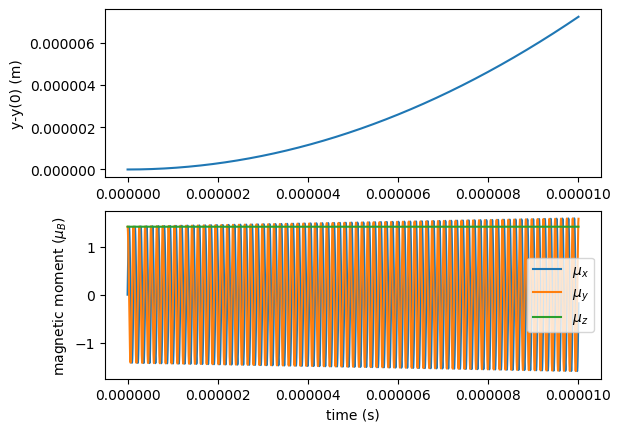

In [106]:
subplot(211)
plot(times,(r_save_2[:,2].-r_save_2[1,2]), label="y");
ylabel("y-y(0) (m)")

subplot(212)
plot(times,mu_save[:,1]./mu_B, label=L"$\mu_x$")
plot(times,mu_save[:,2]./mu_B, label=L"$\mu_y$")
plot(times,mu_save[:,3]./mu_B, label=L"$\mu_z$")
xlabel("time (s)")
ylabel(L"magnetic moment ($\mu_B$)")
legend();